<a href="https://colab.research.google.com/github/pelinbalci/TF_Custom_Models/blob/main/Custom_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Layers

This notebook includes the following topics:

- Sequential & Functional API
- Add Lamba Layer 
- Write a function for lambda layer
- Add parameters to the function for lambda layer
- Define custom loss
- Add parameters to loss function
- Write loss function as a class
- Create custom dense layer

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt

# Visualize model
from tensorflow.keras.layers import Layer
from tensorflow.python.keras.utils.vis_utils import pydot
from tensorflow.python.keras.utils.vis_utils import plot_model

# Function API
from tensorflow.keras.models import Model

# Error : Function call stack:train_function
# https://github.com/tensorflow/tensorflow/issues/43174
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Load Mnist Data

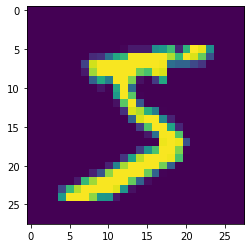

In [ ]:
mnist_data = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

# example
first_array = x_train[0]
plt.imshow(first_array)

## Sequential Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


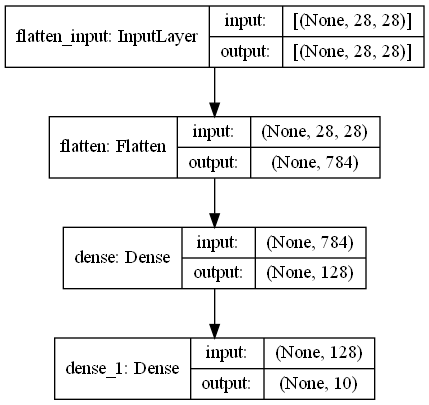

In [ ]:
model._layers = [layer for layer in model._layers if isinstance(layer, Layer)]
plot_model(model, show_shapes=True, show_layer_names=True)

## Functional API

In [ ]:
input_layer = tf.keras.Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
first_dense =tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
output_layer =tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)

func_model = Model(inputs=input_layer, outputs=output_layer)

print(func_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


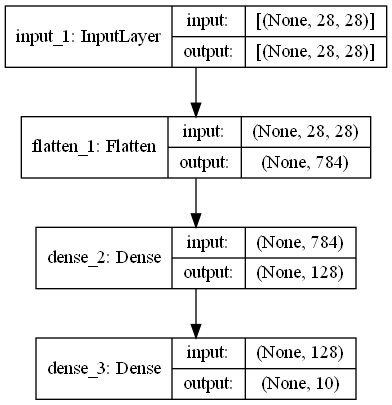

In [ ]:
func_model._layers = [layer for layer in func_model._layers if isinstance (layer, Layer)]
plot_model(func_model, show_shapes = True, show_layer_names = True)

## Add Lambda Layer

In [ ]:
model_lambda = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(lambda x: tf.abs(x)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_lambda.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
lambda (Lambda)              (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


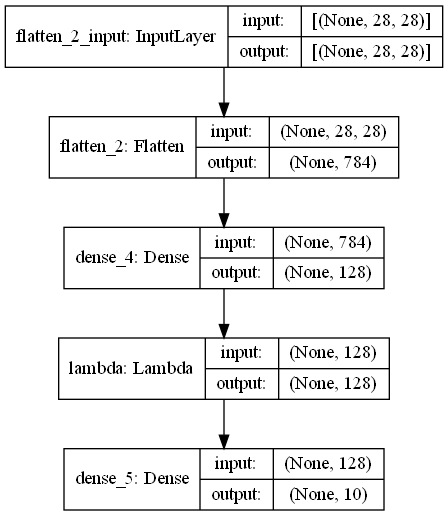

In [ ]:
model_lambda._layers = [layer for layer in model_lambda._layers if isinstance (layer, Layer)]
plot_model(model_lambda, show_shapes = True, show_layer_names = True)

## Define your own function for lambda layer

In [ ]:
# You can give only x parameter for the function
def my_relu(x):
    return K.maximum(-0.1, x)

model_lambda = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(my_relu), 
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_lambda.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
lambda_1 (Lambda)            (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## What if I want to add more parameter for a function? 

In [ ]:
# You can give only x parameter for the function
def my_relu_with_treshold(treshold):
    def my_relu(x):
        return K.maximum(treshold, x)
    return my_relu

model_lambda = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(my_relu_with_treshold(-0.1)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_lambda.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
lambda_2 (Lambda)            (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


# Train Model 

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),  # 'adam'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 22.3896 - accuracy: 0.8150A: 1s - lo
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 4.2671 - accuracy: 0.8819: 2s - loss: 4.6822 -  - ETA: 0s - loss:
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3537 - accuracy: 0.8657: 0s - loss: 1.3561 - accuracy: 
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1558 - accuracy: 0.8535
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2529 - accuracy: 0.8635


[1.2529369592666626, 0.8634999990463257]

In [ ]:
# It has relu activation function in the dense layer. It helps!
func_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

func_model.fit(x_train, y_train, epochs=5)
func_model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 7.7584 - accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4100 - accuracy: 0.9028
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9301: 0s - los
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2430 - accuracy: 0.9397
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9391


[0.274728000164032, 0.9391000270843506]

# Define Custom Loss

In [ ]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

simple_model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

simple_model.compile(optimizer=tf.optimizers.Adam(),
              loss='mean_squared_error',
              metrics=['accuracy'])

simple_model.fit(xs, ys, epochs=10)
print(simple_model.predict([10.0]))

In [ ]:
def my_huber_loss(y_true, y_pred):
    # This function can only get y_true, y_pred 
    # if the abs loss is less than treshold, calculate error^2 /2
    # o.w, calculate treshold* (abs_error - treshold/2)
    
    threshold = 1
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))
    return tf.where(is_small_error, small_error_loss, big_error_loss)

In [ ]:
def trial_loss(y_true, y_pred):
    return y_true - y_pred

In [ ]:
simple_model.compile(optimizer=tf.optimizers.Adam(),
              loss=my_huber_loss,
              metrics=['accuracy'])

simple_model.fit(xs, ys, epochs=5)
print(simple_model.predict([10.0]))

Epoch 1/5
1/1 [==============================] - 0s 435ms/step - loss: 2.9770 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 2.9748 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 2.9726 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 2.9705 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 2.9683 - accuracy: 0.0000e+00
[[-0.73665947]]


In [ ]:
simple_model.compile(optimizer=tf.optimizers.Adam(),
              loss=trial_loss,
              metrics=['accuracy'])

simple_model.fit(xs, ys, epochs=5)
print(simple_model.predict([10.0]))

Epoch 1/5
1/1 [==============================] - 0s 271ms/step - loss: 2.0978 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 2.0953 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 2.0928 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 2.0903 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 2.0878 - accuracy: 0.0000e+00
[[-0.6816591]]


## What if I want to add more parameter for loss function?

In [ ]:
def my_huberloss_with_threshold(threshold):
    def my_huber_loss(y_true, y_pred):
        error = y_true-y_pred
        is_small = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - 0.5*threshold)
        
        return tf.where(is_small, small_error_loss, big_error_loss)
    return my_huber_loss

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=my_huberloss_with_threshold(threshold=1.2))
model.fit(xs, ys, epochs=500,verbose=0)
print(model.predict([10.0]))



simple_model.compile(optimizer=tf.optimizers.Adam(),
              loss=trial_loss,
              metrics=['accuracy'])

simple_model.fit(xs, ys, epochs=5)
print(simple_model.predict([10.0]))

[[18.68279]]


## Loss Function as a Class

In [ ]:
# It should inherit Keras Loss class

from tensorflow.keras.losses import Loss

class MyHuberLossClass(Loss):
    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold
    
    def call(self, y_true, y_pred):
        error = y_true-y_pred
        is_small = tf.abs(error) <= self.threshold
        small_error = tf.square(error) / 2
        big_error = self.threshold*(tf.abs(error) - self.threshold*0.5)
        return tf.where(is_small, small_error, big_error)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=MyHuberLossClass(threshold=1.02))
model.fit(xs, ys, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.670675]]


## Custom Dense Layer

In [ ]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):
    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel", 
                             initial_value=w_init(shape=(input_shape[-1], self.units),
                                                  dtype='float32'),
                             trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias", 
                             initial_value=b_init(shape=(self.units,), dtype='float32'),
                             trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

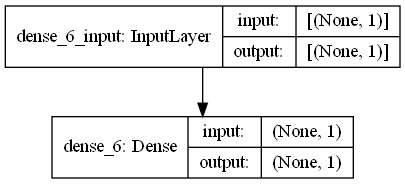

In [ ]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])])

simple_model._layers = [layer for layer in simple_model._layers if isinstance (layer, Layer)]
plot_model(simple_model, show_shapes = True, show_layer_names = True)

In [ ]:
simple_model.compile(optimizer=tf.optimizers.Adam(),
              loss='mean_squared_error',
              metrics=['accuracy'])

simple_model.fit(xs, ys, epochs=10)
print(simple_model.predict([10.0]))

Epoch 1/10
1/1 [==============================] - 0s 297ms/step - loss: 1.7996 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7943 - accuracy: 0.1667
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.7889 - accuracy: 0.1667
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7836 - accuracy: 0.1667
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 1.7782 - accuracy: 0.1667
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7729 - accuracy: 0.1667
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7676 - accuracy: 0.1667
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7624 - accuracy: 0.1667
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 1.7571 - accuracy: 0.1667
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.7519 - accuracy: 0.1667
[[12.317296]]


In [ ]:
# define the dataset
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

[[18.981737]]
[<tf.Variable 'simple_dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9973532]], dtype=float32)>, <tf.Variable 'simple_dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.991794], dtype=float32)>]
